#### Use pydataset to load the mpg dataset.
- Visualize highway mileage (hwy) on the y-axis against engine displacement (displ) on the x-axis.
- Add meaningful labels and a title.
- Add a horizontal dotted line that indicates the average highway mileage.
- Add a vertical dotted line that indicates the average engine displacement.
- Use color to indicate the number of cylinders (cyl) each car's engine has.
- Instead of color, use seperate subplots to indicate the number of cylinders.

In [1]:
from pydataset import data

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data("mpg", show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [3]:
df = data("mpg")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
manufacturer    234 non-null object
model           234 non-null object
displ           234 non-null float64
year            234 non-null int64
cyl             234 non-null int64
trans           234 non-null object
drv             234 non-null object
cty             234 non-null int64
hwy             234 non-null int64
fl              234 non-null object
class           234 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


#### Visualize highway mileage (hwy) on the y-axis against engine displacement (displ) on the x-axis.  Add meaningful labels and a title.

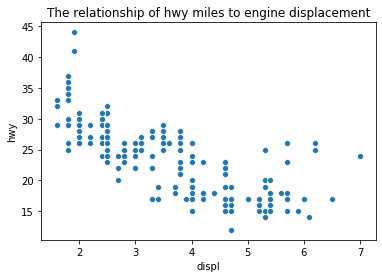

In [4]:
sns.scatterplot(df.displ, df.hwy)
plt.title("The relationship of hwy miles to engine displacement")
plt.show()

#### Add a horizontal dotted line that indicates the average highway mileage. Add a vertical dotted line that indicates the average engine displacement.

In [5]:
df["hwy_mean"] = df.hwy.mean()
df["displ_mean"] = df.displ.mean()

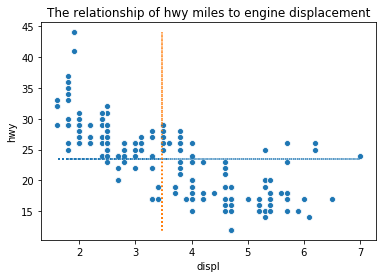

In [6]:
sns.scatterplot(df.displ, df.hwy)
plt.plot(df.displ, df.hwy_mean, linestyle=":")
plt.plot(df.displ_mean, df.hwy, linestyle=":")
plt.title("The relationship of hwy miles to engine displacement")
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 13 columns):
manufacturer    234 non-null object
model           234 non-null object
displ           234 non-null float64
year            234 non-null int64
cyl             234 non-null int64
trans           234 non-null object
drv             234 non-null object
cty             234 non-null int64
hwy             234 non-null int64
fl              234 non-null object
class           234 non-null object
hwy_mean        234 non-null float64
displ_mean      234 non-null float64
dtypes: float64(3), int64(4), object(6)
memory usage: 25.6+ KB


#### Use color to indicate the number of cylinders (cyl) each car's engine has.

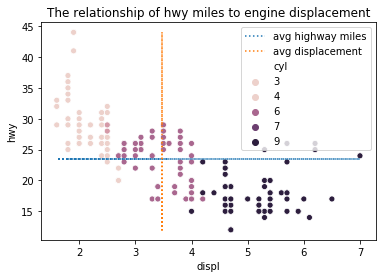

In [8]:
sns.scatterplot(df.displ, df.hwy, hue=df.cyl)
plt.plot(df.displ, df.hwy_mean, linestyle=":", label="avg highway miles")
plt.plot(df.displ_mean, df.hwy, linestyle=":", label="avg displacement")
plt.title("The relationship of hwy miles to engine displacement")
plt.legend()
plt.show()

#### Instead of color, use seperate subplots to indicate the number of cylinders.

In [9]:
df.cyl.unique()

array([4, 6, 8, 5])

In [10]:
for cyl in df.cyl.unique):
    sns.scatterplot(df.displ, df.hwy, hue=cyl)
    plt.plot(df.displ, df.hwy_mean, linestyle=":", label="avg highway miles")
    plt.plot(df.displ_mean, df.hwy, linestyle=":", label="avg displacement")
    plt.title("The relationship of hwy miles to engine displacement")
    plt.legend()
    plt.show()

SyntaxError: invalid syntax (<ipython-input-10-74af9be3e369>, line 1)

### Zach's way

In [11]:
# plt.rc("size", figure=(12,6))
plt.rc("axes.spines", top=False, right=False, left=True, bottom=True)
# plt.rc("font", size=14)

less optimal legend way

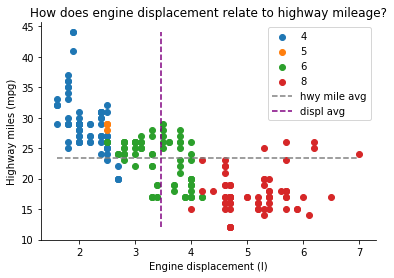

In [36]:
for cyl in sorted(df.cyl.unique()):
    subset = df[df.cyl == cyl]
    plt.scatter(subset.displ, subset.hwy, label=cyl)
plt.legend(title='# of cylinders')

plt.title("How does engine displacement relate to highway mileage?")
plt.xlabel("Engine displacement (l)")
plt.ylabel("Highway miles (mpg)")
plt.hlines(df.hwy.mean(), df.displ.min(), df.displ.max(), ls='--', color="grey", label="hwy mile avg")
plt.vlines(df.displ.mean(), df.hwy.min(), df.hwy.max(), ls='--', color="purple", label="displ avg")

plt.legend()
plt.show()

better legend

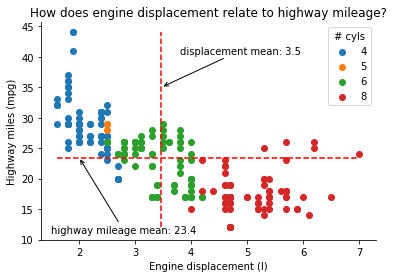

In [61]:
for cyl in sorted(df.cyl.unique()):
    subset = df[df.cyl == cyl]
    plt.scatter(subset.displ, subset.hwy, label=cyl)
plt.legend(title='# cyls')

plt.title("How does engine displacement relate to highway mileage?")
plt.xlabel("Engine displacement (l)")
plt.ylabel("Highway miles (mpg)")
plt.hlines(df.hwy.mean(), df.displ.min(), df.displ.max(), ls='--', color="red")
plt.vlines(df.displ.mean(), df.hwy.min(), df.hwy.max(), ls='--', color="red")

plt.annotate(
    f"displacement mean: {df.displ.mean():.1f}",
    xy=(df.displ.mean(),35),
    xytext=(3.8,40.5),
    arrowprops={'arrowstyle':'->'}
)

plt.annotate(
    f"highway mileage mean: {df.hwy.mean():.1f}",
    xy=(2, df.hwy.mean()),
    xytext=(1.5,11),
    arrowprops={'arrowstyle':'->'}
)

plt.show()

make subplots

In [13]:
list(enumerate(["a","b","c"]))

[(0, 'a'), (1, 'b'), (2, 'c')]

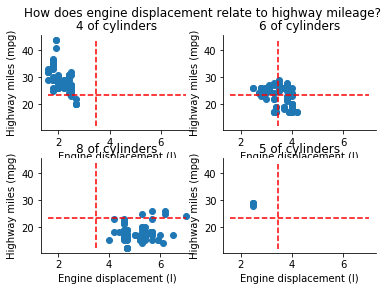

In [19]:
for i, cyl in enumerate(df.cyl.unique()):
    plt.subplot(2, 2, i+1)
    subset = df[df.cyl == cyl]
    plt.scatter(subset.displ, subset.hwy, label=cyl)
    
    plt.title(f'{cyl} of cylinders')
    plt.xlabel("Engine displacement (l)")
    plt.ylabel("Highway miles (mpg)")
    plt.hlines(df.hwy.mean(), df.displ.min(), df.displ.max(), ls='--', color="red")
    plt.vlines(df.displ.mean(), df.hwy.min(), df.hwy.max(), ls='--', color="red")


plt.subplots_adjust(hspace=.3)
plt.suptitle("How does engine displacement relate to highway mileage?")

plt.show()

more customizable subplots

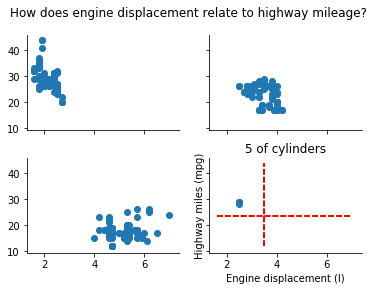

In [24]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)

for ax, cyl in zip(axs.ravel(), df.cyl.unique()):
    subset = df[df.cyl == cyl]
    ax.scatter(subset.displ, subset.hwy, label=cyl)
    
    plt.title(f'{cyl} of cylinders')
    plt.xlabel("Engine displacement (l)")
    plt.ylabel("Highway miles (mpg)")
    plt.hlines(df.hwy.mean(), df.displ.min(), df.displ.max(), ls='--', color="red")
    plt.vlines(df.displ.mean(), df.hwy.min(), df.hwy.max(), ls='--', color="red")

plt.subplots_adjust(hspace=.3)
plt.suptitle("How does engine displacement relate to highway mileage?")

plt.show()